# Compression of the Iris data set

This notebook was created to provide a simple illustration of the effectiveness of dimensionality reduction and sparse representation to reduce the complexity of a classifier for flower type. Methods utilised are:

- Principal Component Analysis (PCA)
- Independant Component Analysis (ICA)
- Dictionary learning

In [5]:
import numpy as np # linear algebra
print("numpy")
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)  
print("pandas")
import matplotlib.pyplot as plt # plotting
print("matplotlib")
from scipy import stats # statistics
from scipy.spatial import distance
print("scipy")
from sklearn.decomposition import FastICA, PCA
import sklearn.preprocessing as prepro
print("scikit")
import math
print("math")

plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
      titleweight='bold', titlesize=18, titlepad=10)
plt.rcParams['figure.figsize'] = [18,10]

numpy
pandas
matplotlib
scipy
scikit
math


In [6]:
data_set = pd.read_csv('iris.csv')
print(data_set.shape)
data_set.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
species_key = data_set['species'].unique()
print(species_key)

['setosa' 'versicolor' 'virginica']


The dataset has four features and three unquie label values. It is impossible to plot the points in the 4D feature space, so some form of dimensionality reduction must be performed. 

It is clear that two features are measurements related to the sepal and the remaining two are related to the petal. So a very simple solution is to create a ratio of the length and width for both the sepal and petal for each flower. This ratio feature space has two dimensions.

In [7]:
data_set['sepel_ratio'] = data_set['sepal_length']/data_set['sepal_width']
data_set['petal_ratio'] = data_set['petal_length']/data_set['petal_width']
data_set.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepel_ratio,petal_ratio
0,5.1,3.5,1.4,0.2,setosa,1.457,7.0
1,4.9,3.0,1.4,0.2,setosa,1.633,7.0
2,4.7,3.2,1.3,0.2,setosa,1.469,6.5
3,4.6,3.1,1.5,0.2,setosa,1.484,7.5
4,5.0,3.6,1.4,0.2,setosa,1.389,7.0


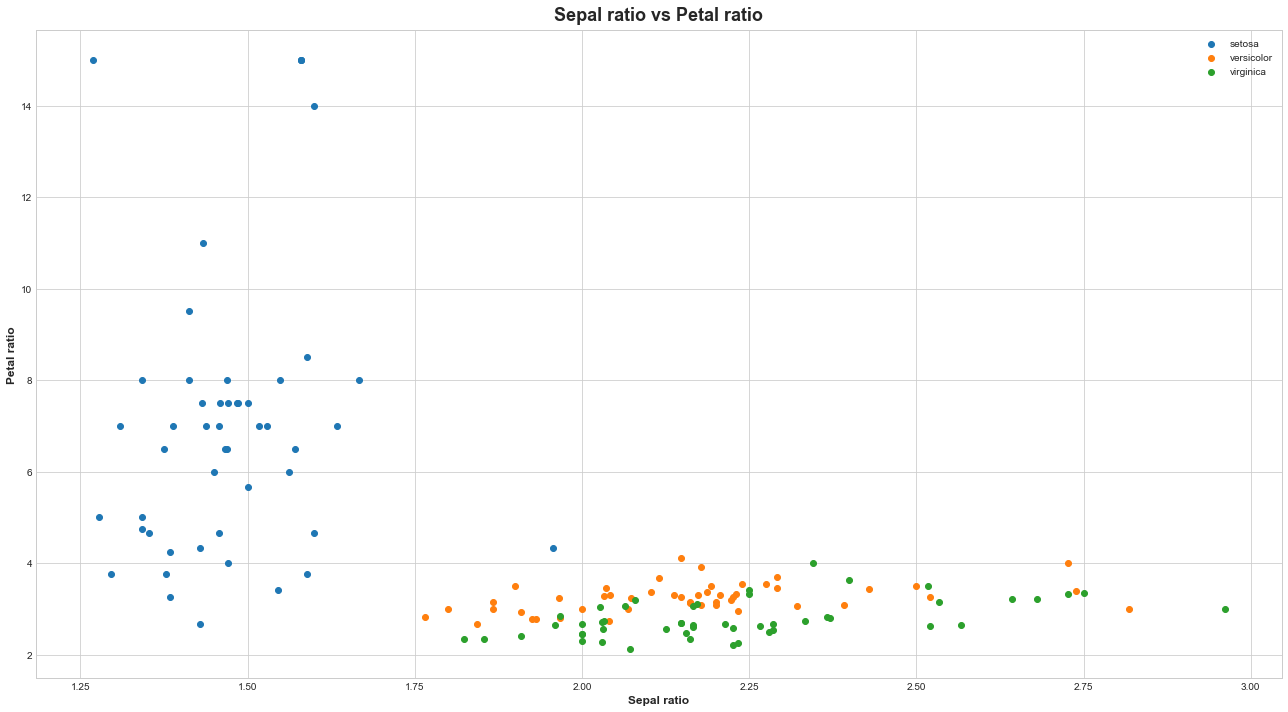

In [15]:
fig, ax = plt.subplots()
ax.set_title('Sepal ratio vs Petal ratio')
ax.set_xlabel('Sepal ratio')
ax.set_ylabel('Petal ratio')

ax.scatter(data_set['sepel_ratio'][0:49], data_set['petal_ratio'][0:49], label=species_key[0])
ax.scatter(data_set['sepel_ratio'][50:99], data_set['petal_ratio'][50:99], label=species_key[1])
ax.scatter(data_set['sepel_ratio'][100:150], data_set['petal_ratio'][100:150], label=species_key[2])

ax.legend()
plt.show()


From the above scatter plot we can see that the majority of setsosa points can easily be distinguished. However there is too much overlap for versicolor and virginica points, so a more complex process is required to acheive better separation.

In [16]:
data_pca = PCA(n_components=2).fit_transform(data_set.iloc[:,:4])

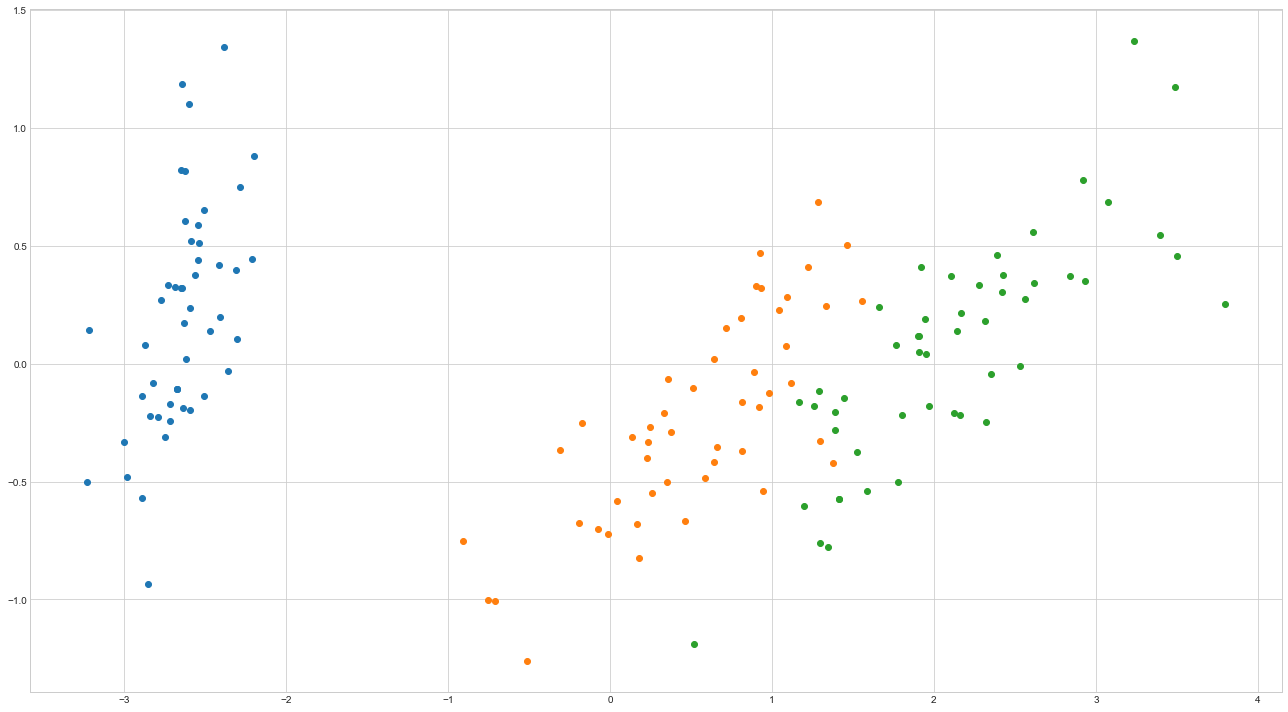

In [17]:
set_0 = data_pca[0:49,0];
set_1 = data_pca[0:49,1];
plt.scatter(set_0, set_1)

set_0 = data_pca[50:99,0];
set_1 = data_pca[50:99,1];
plt.scatter(set_0, set_1)

set_0 = data_pca[100:150,0];
set_1 = data_pca[100:150,1];
plt.scatter(set_0, set_1)

plt.show()

In [18]:
data_norm = prepro.normalize(data_set.iloc[:,:4], norm='l2')
data_pca_norm = PCA(n_components=2).fit_transform(data_norm)

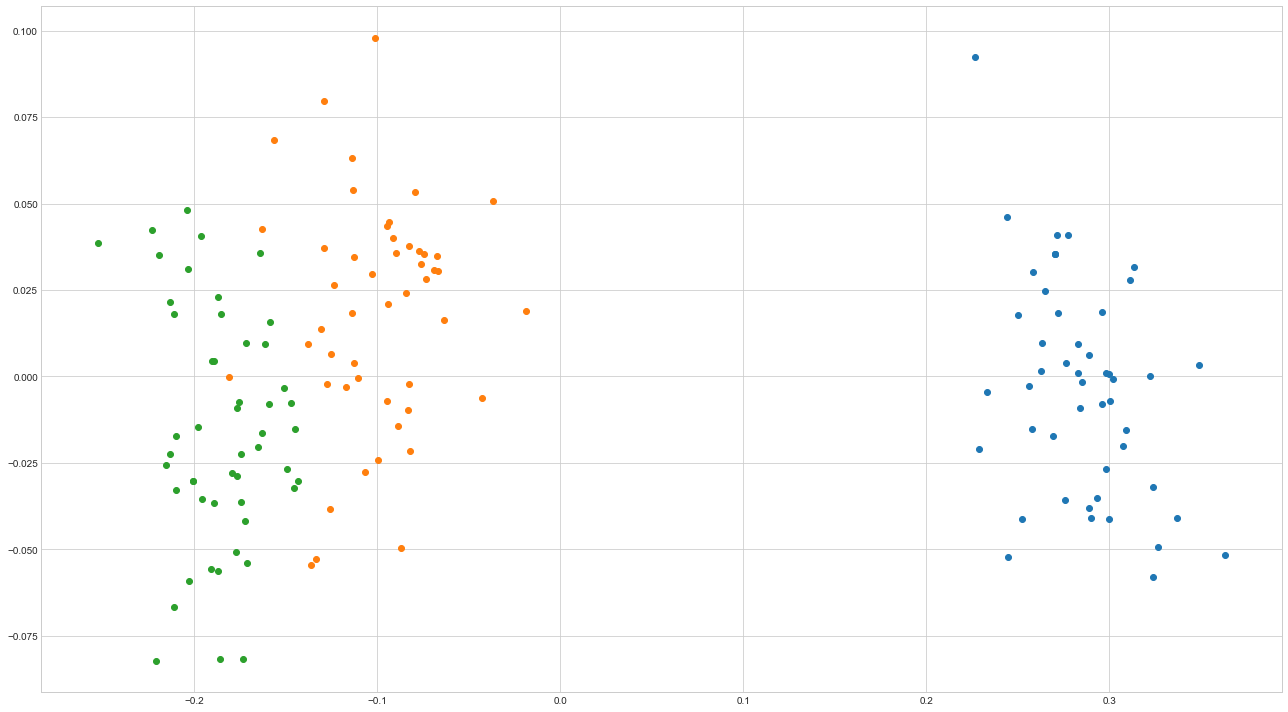

In [19]:
set_0 = data_pca_norm[0:49,0];
set_1 = data_pca_norm[0:49,1];
plt.scatter(set_0, set_1)

set_0 = data_pca_norm[50:99,0];
set_1 = data_pca_norm[50:99,1];
plt.scatter(set_0, set_1)

set_0 = data_pca_norm[100:150,0];
set_1 = data_pca_norm[100:150,1];
plt.scatter(set_0, set_1)

plt.show()

In [10]:
data_ica = FastICA(n_components=2).fit_transform(data_set.iloc[:,:4])

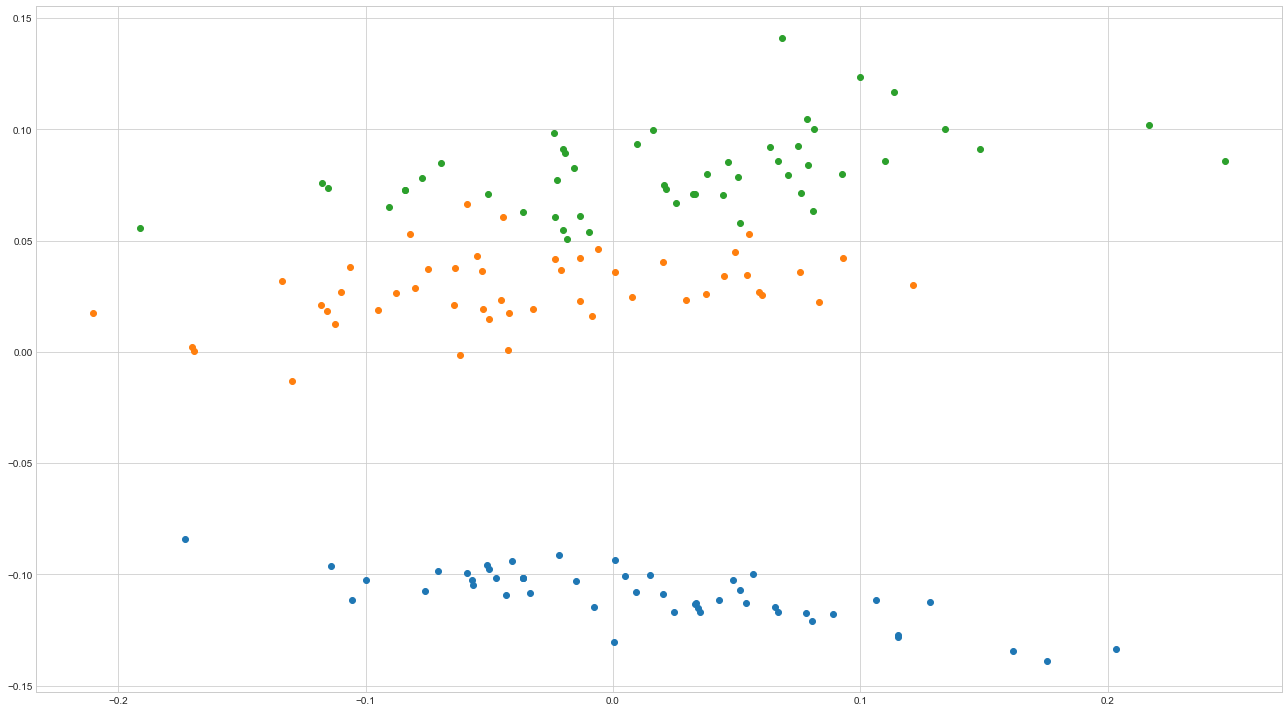

In [11]:
set_0 = data_ica[0:49,0];
set_1 = data_ica[0:49,1];
plt.scatter(set_0, set_1)

set_0 = data_ica[50:99,0];
set_1 = data_ica[50:99,1];
plt.scatter(set_0, set_1)

set_0 = data_ica[100:150,0];
set_1 = data_ica[100:150,1];
plt.scatter(set_0, set_1)

plt.show()

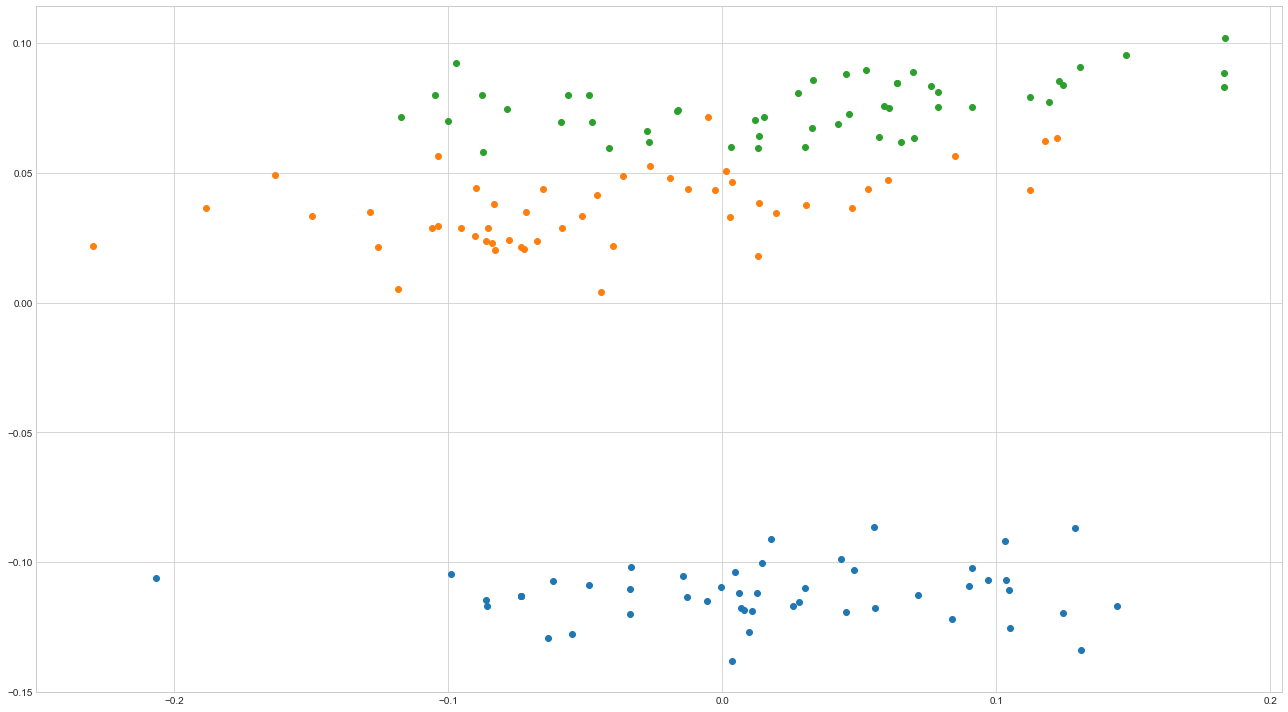

In [20]:
data_ica_norm = FastICA(n_components=2).fit_transform(data_norm)

set_0 = data_ica_norm[0:49,0];
set_1 = data_ica_norm[0:49,1];
plt.scatter(set_0, set_1)

set_0 = data_ica_norm[50:99,0];
set_1 = data_ica_norm[50:99,1];
plt.scatter(set_0, set_1)

set_0 = data_ica_norm[100:150,0];
set_1 = data_ica_norm[100:150,1];
plt.scatter(set_0, set_1)

plt.show()

In [45]:
from sklearn.metrics import pairwise_distances

#X = [(3,4),(0,1)]
#Y = [(0,0),(3,4)]
#coords = [(35.0456, -85.2672),
#          (35.1174, -89.9711),
#          (35.9728, -83.9422),
#          (36.1667, -86.7833)]

#dist = distance.cdist(coords,coords, 'euclidean')
#dist = pairwise_distances(X, Y)#math.dist(X, Y)
#print(dist)

dist = pairwise_distances(data_pca, data_ica).diagonal()
print(dist.sum())

#set_0 = data_pca[:,0] - data_ica[:,0];
#set_1 = data_pca[:,1] - data_ica[:,1];

#bad_calc = math.sqrt((data_pca[1,0]-data_ica[1,0])**2 + (data_pca[1,1]-data_ica[1,1])**2)
#print(dist[1])
#print(bad_calc)
#print(sum(set_0))
#print(sum(set_1))

286.29279096715715


In [46]:
dist = pairwise_distances(data_pca_norm, data_ica_norm).diagonal()
print(dist.sum())

32.14955327545227


In [21]:
from sklearn.datasets import make_sparse_coded_signal
from sklearn.decomposition import DictionaryLearning
X, dictionary, code = make_sparse_coded_signal(n_samples=100, n_components=15, n_features=20, n_nonzero_coefs=10,random_state=42)
dict_learner = DictionaryLearning(n_components=15, transform_algorithm='lasso_lars', random_state=42)
print(X.shape)
X_transformed = dict_learner.fit_transform(X)
print(X_transformed.shape)
np.mean(X_transformed == 0)

(20, 100)
(20, 15)


0.8833333333333333

In [53]:
print(X_transformed[0,:])
X_test = dict_learner.transform(X[0:1,:])
print(X_test[0,:])

[0.         0.         6.32544839 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
[0.         0.         6.32544839 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


In [22]:
iris_dict = DictionaryLearning(n_components=8, transform_n_nonzero_coefs=1, random_state=42)

data_dict = iris_dict.fit_transform(data_set.iloc[:,:4])
print(data_dict.shape)

(150, 8)


In [23]:
def sparsePlot(sparse_vec):
    temp = np.where(sparse_vec != 0)
    return temp[0]*50 + sparse_vec[temp[0]]
    

In [24]:
#my_vec = np.array([0,0,0,7,0,0,0,0])
#res = sparsePlot(my_vec)
#print(res)
#print(my_vec[res])
list_plot = np.array([]);
for entry in data_dict:
    list_plot = np.append(list_plot, sparsePlot(entry))
    
print(list_plot.shape)

(150,)


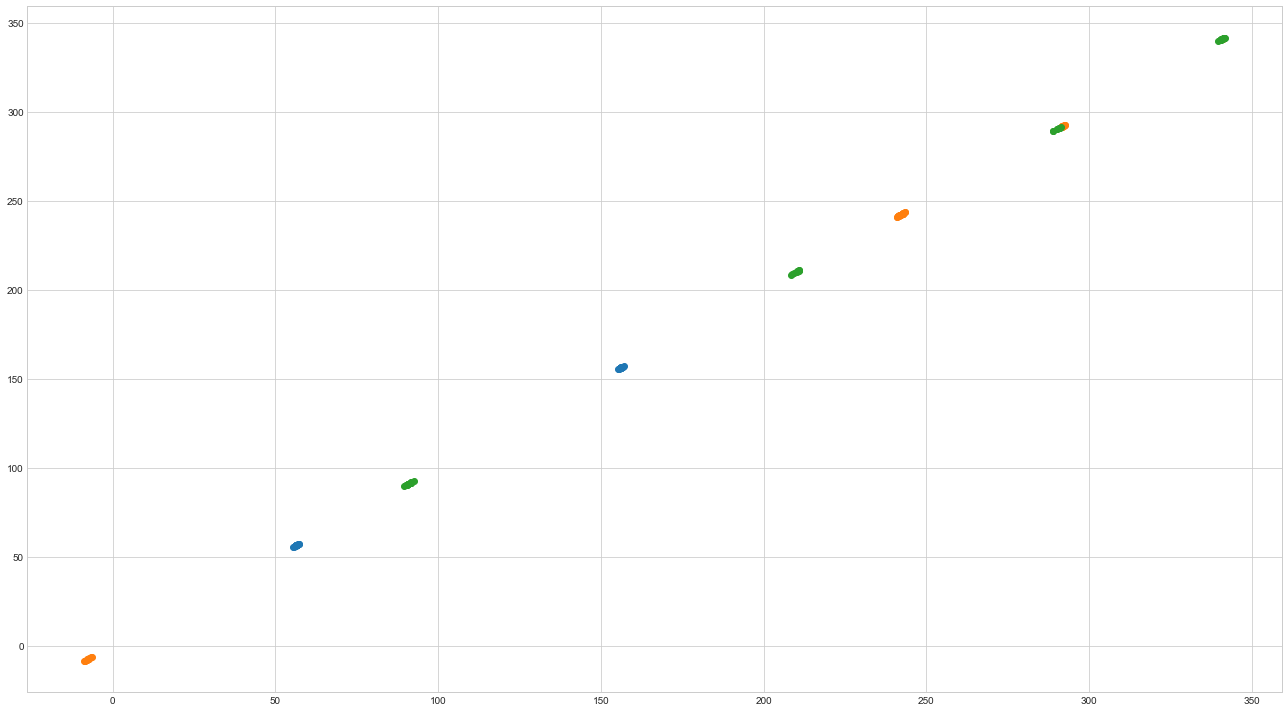

In [25]:
set_0 = list_plot[0:49];
set_1 = list_plot[0:49];
plt.scatter(set_0, set_1)

set_0 = list_plot[50:99];
set_1 = list_plot[50:99];
plt.scatter(set_0, set_1)

set_0 = list_plot[100:150];
set_1 = list_plot[100:150];
plt.scatter(set_0, set_1)

plt.show()

In [93]:
np.count_nonzero(data_dict[100:150,:], axis=0)

array([ 0,  0, 18,  0,  8,  0,  8, 16], dtype=int64)

In [99]:
f1 = data_dict[50:99,:]
f2 = data_dict[100:150,:]

print(f2[:,7:8])

[[  0.        ]
 [  0.        ]
 [ -9.91879893]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [ -9.07694824]
 [ -8.93098145]
 [ -9.47746217]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [ -9.77342494]
 [  0.        ]
 [  0.        ]
 [ -8.61155816]
 [  0.        ]
 [  0.        ]
 [ -8.51525301]
 [ -8.56268802]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [-10.51414979]
 [  0.        ]
 [  0.        ]
 [ -8.43416238]
 [ -9.52668865]
 [ -9.56353114]
 [ -9.40664547]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [ -9.28465317]
 [ -8.62649515]
 [ -9.06826708]
 [  0.        ]
 [  0.        ]]


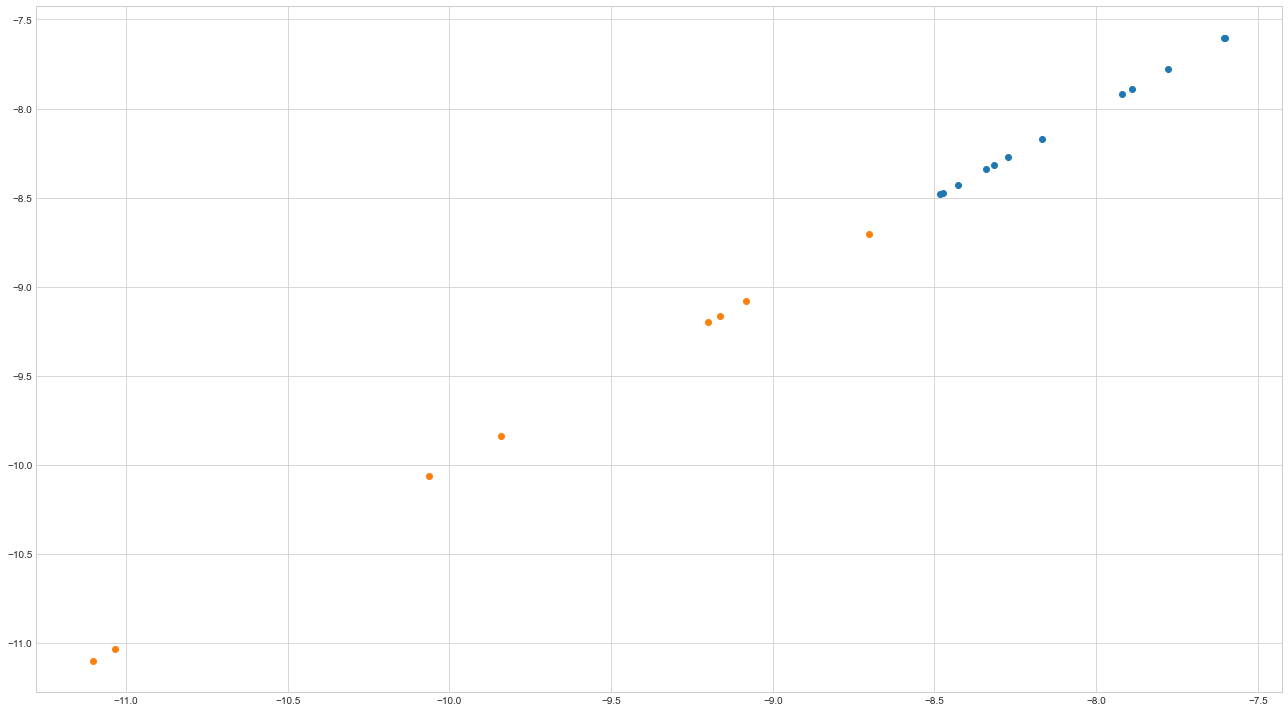

In [123]:
#def get_non
#f1_c6 = np.array([]);
#for i, entry in zip(range(len(f1[:,6:7])),f1[:,6:7]): #Improve
#    if (entry < 0):
#        f1_c6 = np.append(f1_c6, i)

f1_c6 = np.nonzero(f1[:,6:7])[0]
#print(f1_c6)
f1_6 = f1[:,6:7][f1_c6]
plt.scatter(f1_6,f1_6)

f2_c6 = np.nonzero(f2[:,6:7])[0]
f2_6 = f2[:,6:7][f2_c6]
plt.scatter(f2_6,f2_6)

plt.show()

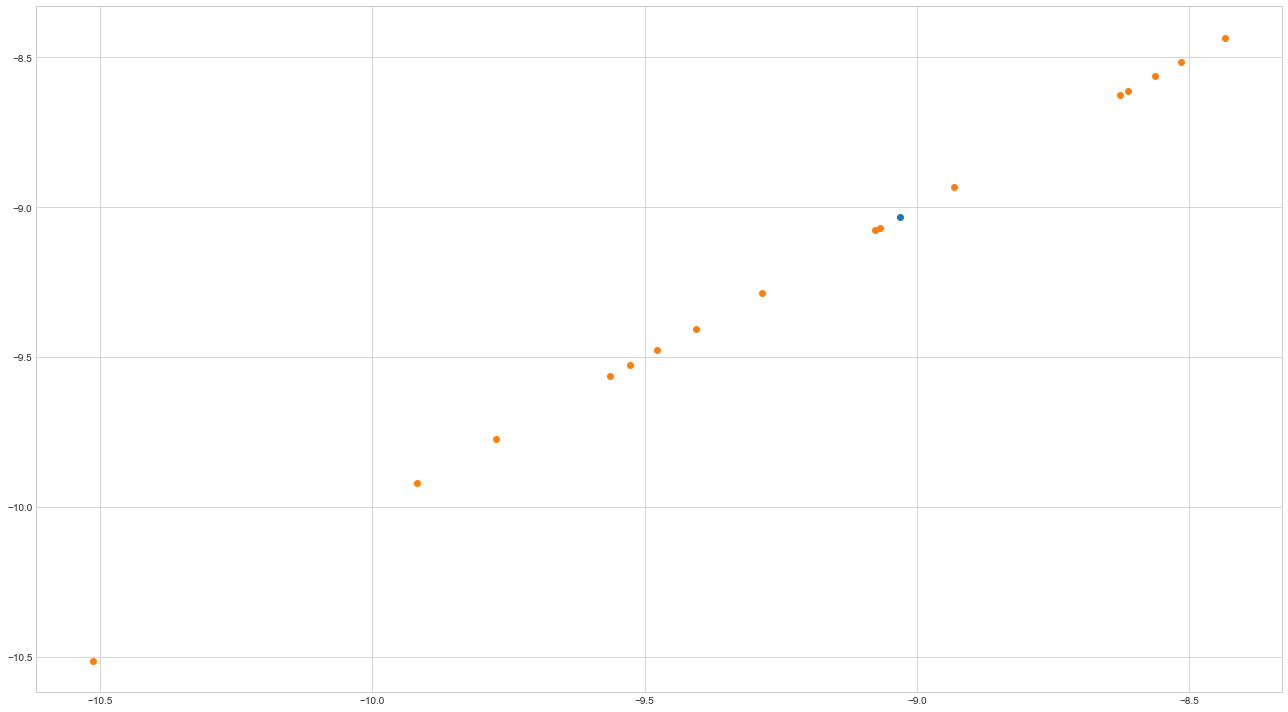

In [124]:
f1_c7 = np.nonzero(f1[:,7:8])[0]
#print(f1_c6)
f1_7 = f1[:,7:8][f1_c7]
plt.scatter(f1_7,f1_7)

f2_c7 = np.nonzero(f2[:,7:8])[0]
f2_7 = f2[:,7:8][f2_c7]
plt.scatter(f2_7,f2_7)

plt.show()

In [56]:
train_data  = pd.DataFrame(columns = data_set.columns)
test_data  = pd.DataFrame(columns = data_set.columns)
key_indx = 0;

for key in species_key:
    
    print(key)
    tot = (data_set.species == key).sum()
    train_tot = math.floor(tot*.8)
    #test_tot = tot - train_tot

    train_data = pd.concat([train_data, data_set.iloc[key_indx:key_indx+train_tot,:]])
    #print(train_data)
    test_data = pd.concat([test_data, data_set.iloc[key_indx+train_tot+1:key_indx+tot,:]])
    key_indx = key_indx + tot +1
    print(key_indx)

print("Training data size:")
print(train_data.shape)
print("Testing data size:")
print(test_data.shape)

setosa
51
versicolor
102
virginica
153
Training data size:
(120, 5)
Testing data size:
(25, 5)


In [67]:
#unuseful, use k means
#from sklearn.neural_network import MLPClassifier

#clf = MLPClassifier(random_state=1)
#clf.fit(train_data.iloc[:,:4], train_data.iloc[:,-1])
#print("Model trained")
#score = clf.score(test_data.iloc[:,:4], test_data.iloc[:,-1])
#print(score)

#pred = clf.predict(test_data.iloc[:,:4])
#print(pred)
#print(test_data.iloc[:,-1])